In [ ]:
# IMPORTED LIBRARIES
import pandas as pd                                                             # Used in accessing and reading the dataset
import matplotlib.pyplot as plt                                                 # Used for plotting graphs
import numpy as np                                                              # For numerical calculations

""" MAPPING THE PEARSON CORRELATION HEATMAP FOR FEATURE SELECTION """

# Loading the dataset
df = pd.read_excel(r'01 - DATASET\02 - AUH Weather 2023-2024 [CLEANED].xlsx')

# Skip through non-numeric values for Pearson calculation
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the Pearson correlation matrix
correlation_matrix = numeric_df.corr(method='pearson')

# Plot the heatmap
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Pearson Correlation Heatmap')

# Correlation values
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='black')

plt.tight_layout()
plt.show()


MAE: 0.0832
RMSE: 0.1032
R²: 0.9995



c:\Users\Rianne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


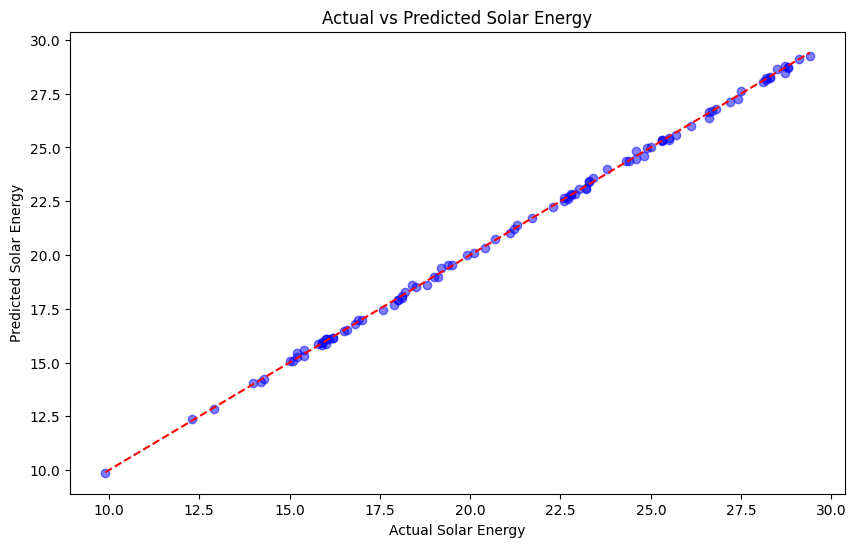

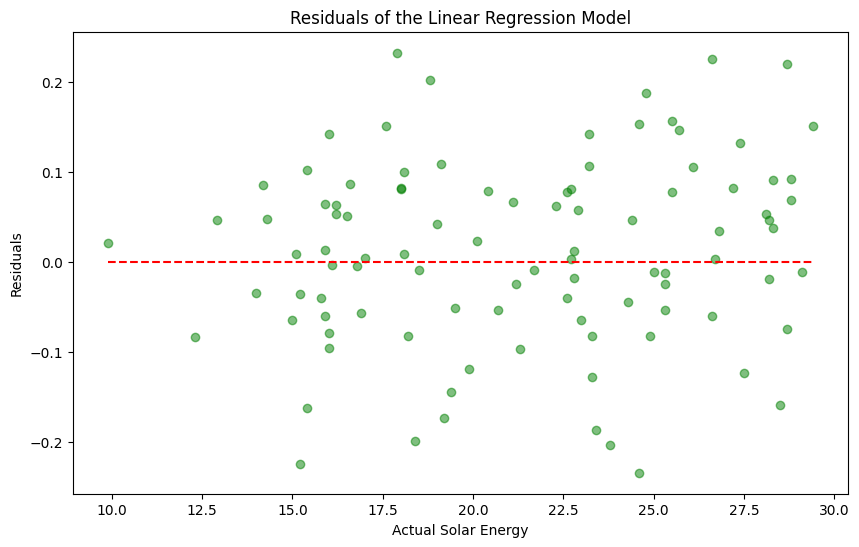

In [54]:
# IMPORTED LIBRARIES
import pandas as pd                                                             # Used in accessing and reading the dataset
from sklearn.linear_model import LinearRegression                               # The machine learning algorithm
from sklearn.model_selection import train_test_split                            # Training and testing sets
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score   # Evaluation metrics
import matplotlib.pyplot as plt                                                 # Used for plotting graphs

""" MULTIPLE LINEAR REGRESSION """

# Loading the dataset
data = pd.read_excel(r'01 - DATASET\02 - AUH Weather 2023-2024 [CLEANED].xlsx') # Bigger dataset

# Selecting the variables and target
X = data[['TEMP', 'HUMIDITY', 'SOLAR_RADIATION']]  # Features
y = data['SOLAR_ENERGY']  # Target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TRAINING THE MODEL
model_01 = LinearRegression()
model_01.fit(X_train, y_train)

# PREDICTIONS
y_pred = model_01.predict(X_test)

# EVALUATION METRICS
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")
print()

# VISUALIZATION

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Solar Energy')
plt.xlabel('Actual Solar Energy')
plt.ylabel('Predicted Solar Energy')
plt.show()

# Residual plot (difference between actual and predicted values)
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
plt.scatter(y_test, residuals, color='green', alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), color='red', linestyle='--')
plt.title('Residuals of the Linear Regression Model')
plt.xlabel('Actual Solar Energy')
plt.ylabel('Residuals')
plt.show()


MAE: 0.1128
RMSE: 0.1393
R²: 0.9992



c:\Users\Rianne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


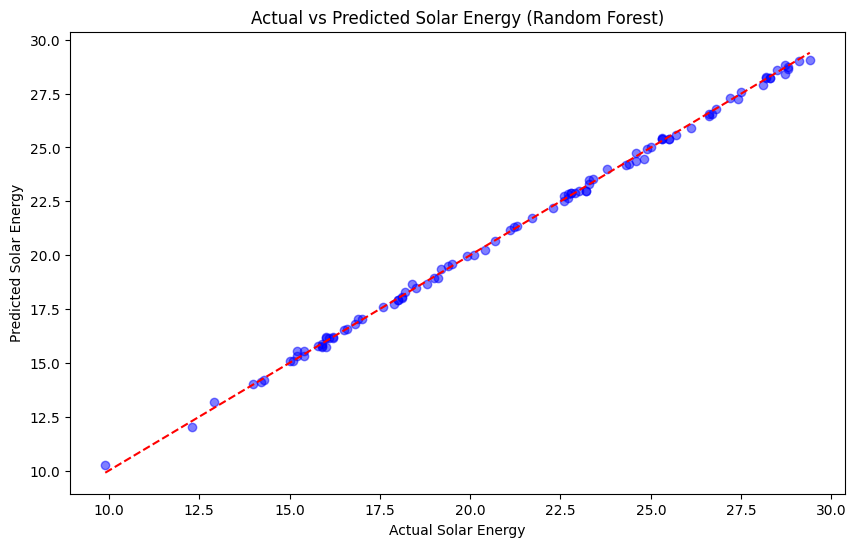

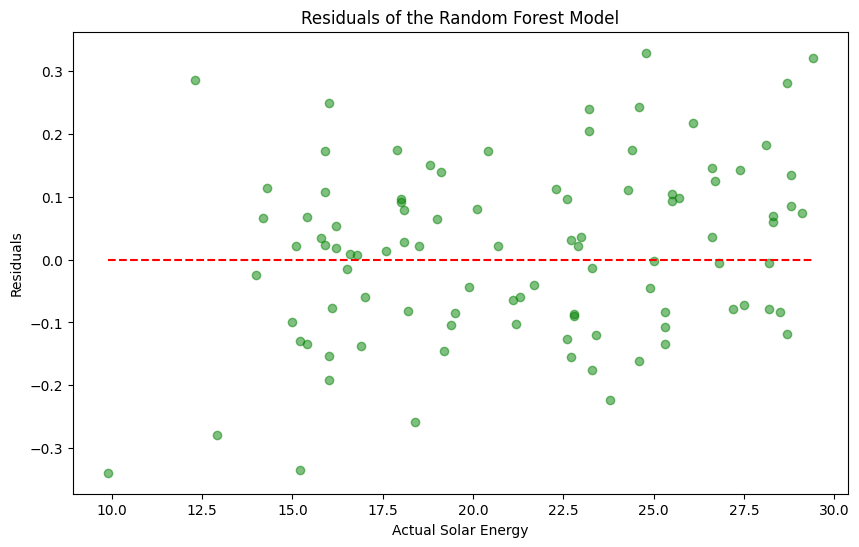

In [55]:
# IMPORTED LIBRARIES
import pandas as pd                                                             # Used in accessing and reading the dataset
from sklearn.ensemble import RandomForestRegressor                              # The machine learning algorithm
from sklearn.model_selection import train_test_split                            # Training and testing sets
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score   # Evaluation metrics
import matplotlib.pyplot as plt                                                 # Used for plotting graphs

""" RANDOM FOREST REGRESSION """

# Loading the dataset
data = pd.read_excel(r'01 - DATASET\02 - AUH Weather 2023-2024 [CLEANED].xlsx') # Bigger dataset

# Selecting the variables and target
X = data[['TEMP', 'HUMIDITY', 'SOLAR_RADIATION']]  # Features
y = data['SOLAR_ENERGY']  # Target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TRAINING THE MODEL
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# PREDICTIONS
y_pred = model.predict(X_test)

# PERFORMANCE METRICS
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")
print()

# VISUALIZATION

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Solar Energy (Random Forest)')
plt.xlabel('Actual Solar Energy')
plt.ylabel('Predicted Solar Energy')
plt.show()

# Residual plot (difference between actual and predicted values)
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
plt.scatter(y_test, residuals, color='green', alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), color='red', linestyle='--')
plt.title('Residuals of the Random Forest Model')
plt.xlabel('Actual Solar Energy')
plt.ylabel('Residuals')
plt.show()


In [ ]:
# IMPORTED LIBRARIES
import pandas as pd                                                             # Used in accessing and reading the dataset
from sklearn.model_selection import train_test_split                            # Training and testing sets

""" USER-BASED INPUT SOLAR ENERGY PREDICTION """

# Loading the dataset
data = pd.read_excel(r'01 - DATASET\02 - AUH Weather 2023-2024 [CLEANED].xlsx') # Bigger dataset

# Selecting the variables and target
X = data[['TEMP', 'HUMIDITY', 'SOLAR_RADIATION']]  # Features
y = data['SOLAR_ENERGY']  # Target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

# Train Random Forest Regression model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Function to collect user input
def get_user_input():
    print("\nEnter the following feature values for prediction:")
    try:
        solar_radiation = float(input("Solar Radiation (kWh/m²): "))
        temperature = float(input("Temperature (°C): "))
        humidity = float(input("Humidity (%): "))
        return np.array([[solar_radiation, temperature, humidity]])
    except ValueError:
        print("Invalid input. Please enter numeric values.")
        return get_user_input()

# Function to predict using both models
def predict_solar_energy(features):
    linear_pred = linear_regression_model.predict(features)[0]
    random_forest_pred = random_forest_model.predict(features)[0]
    return linear_pred, random_forest_pred

# Execute solar energy output
if __name__ == "__main__":
    # User input and prediction
    while True:
        user_features = get_user_input()
        linear_prediction, rf_prediction = predict_solar_energy(user_features)
        
        print("\nPredicted Solar Energy:")
        print(f"Linear Regression: {linear_prediction:.2f} kWh")
        print(f"Random Forest Regression: {rf_prediction:.2f} kWh")
        
        # Option to continue or exit
        another = input("\nWould you like to make another prediction? (YES|NO): ").strip().lower()
        if another != "yes":
            print("Exiting program!")
            break
